In [1]:
import numpy as np
import pandas as pd
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter


In [2]:
df=pd.read_csv("parkinsons.data")
pd.set_option('display.max_columns', None)
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
df.shape

(195, 24)

NB: (small dataset) 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

> Droping meaningful columns

In [5]:
df.drop('name',axis=1, inplace=True)

# STATISTICS ANALYSIS

In [6]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


*Number of sick and healthy in the database*

In [7]:
health=pd.Categorical(df['status'])
health = health.rename_categories(["healthy","sparkinson's"]) 
health.describe()

,counts,freqs
categories,,
healthy,48,0.246154
sparkinson's,147,0.753846


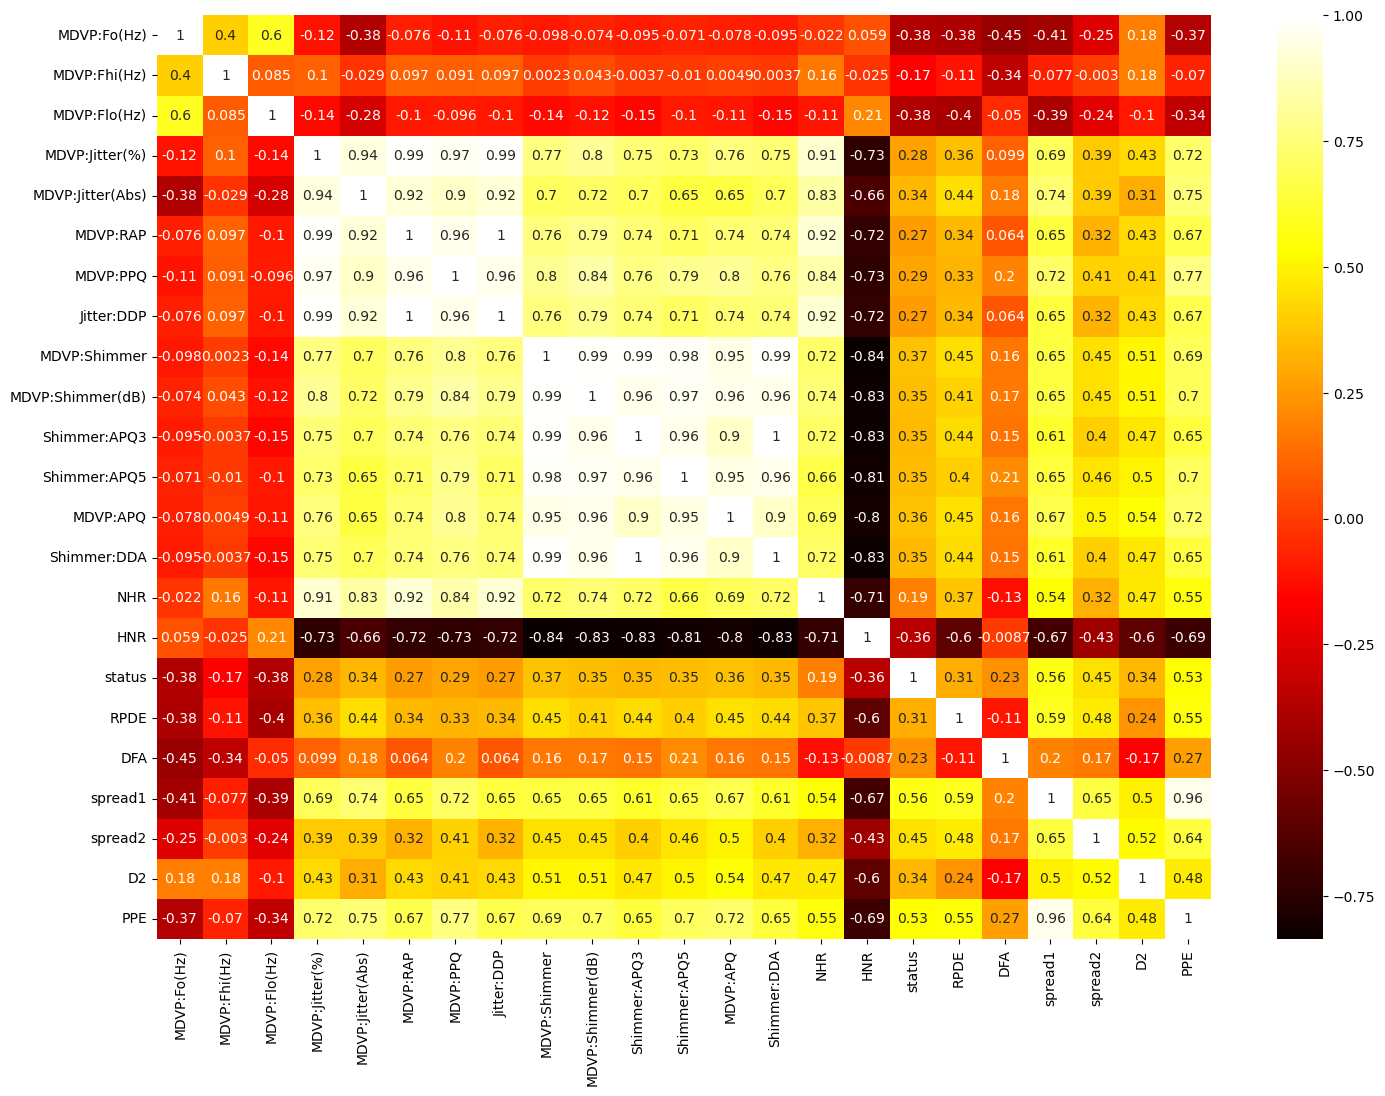

In [8]:
#corrolation Matrix
corr=df.corr()
plt.figure(figsize=(17,12))
sns.heatmap(corr,annot=True,cmap='hot');

*if we want to to look closly to correlation between our target 'status' and the others feautures*

In [9]:
corr=pd.DataFrame(corr,columns=df.columns)
corr.status

MDVP:Fo(Hz)        -0.383535
MDVP:Fhi(Hz)       -0.166136
MDVP:Flo(Hz)       -0.380200
MDVP:Jitter(%)      0.278220
MDVP:Jitter(Abs)    0.338653
MDVP:RAP            0.266668
MDVP:PPQ            0.288698
Jitter:DDP          0.266646
MDVP:Shimmer        0.367430
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:APQ5        0.351148
MDVP:APQ            0.364316
Shimmer:DDA         0.347608
NHR                 0.189429
HNR                -0.361515
status              1.000000
RPDE                0.308567
DFA                 0.231739
spread1             0.564838
spread2             0.454842
D2                  0.340232
PPE                 0.531039
Name: status, dtype: float64

we can see that the correlation is not very meaningful but we're going to use all feautures 

# **MODELING**

In [10]:
#taget 
y=df['status']
#features 
X=df.drop('status',axis=1)

**Because we have small dataset, we split data to train and test data to avoid leakage before Normalisation**

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print( "training feature set shape",X_train.shape)
print( "testing feature set shape",X_test.shape)
print( "training tagret set shape",Y_train.shape)
print( "training target set shape",Y_test.shape)

training feature set shape (156, 22)
testing feature set shape (39, 22)
training tagret set shape (156,)
training target set shape (39,)


**Normalisation**

In [12]:
 from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X_train)
X_train=transformer.transform(X_train)
X_test=transformer.transform(X_test)

In [13]:
# to see X_train
print(X_train)

[[5.80550069e-01 6.11269927e-01 5.29205307e-01 ... 9.43952787e-04
  1.11495530e-02 7.55279795e-04]
 [5.58193361e-01 6.33072490e-01 5.27748635e-01 ... 1.12008719e-03
  1.17532790e-02 8.89000422e-04]
 [6.04954504e-01 7.36565568e-01 2.87249384e-01 ... 9.63478246e-04
  9.08589497e-03 8.03334174e-04]
 ...
 [5.87755760e-01 6.12437826e-01 5.12082010e-01 ... 1.06065927e-03
  1.23544349e-02 8.33975258e-04]
 [5.62299966e-01 6.61589976e-01 4.95209743e-01 ... 1.01104779e-03
  9.03702010e-03 1.29060552e-03]
 [5.75643458e-01 6.07781615e-01 5.35071727e-01 ... 6.85042367e-04
  7.90619441e-03 3.96444838e-04]]


# FIRST APRROACH

In [14]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

In [15]:
models=[DecisionTreeClassifier(),ExtraTreeClassifier()]
for model in models:
    model.fit(X_train, Y_train)
    score=model.score(X_test,Y_test)
    print("model: {}  score {}".format(model,score))

model: DecisionTreeClassifier()  score 0.8717948717948718
model: ExtraTreeClassifier()  score 0.8717948717948718


**OPTIMISATION WITH RandomizedSearchCV**

In [16]:
from sklearn.model_selection import RandomizedSearchCV
parametre={'max_depth' : (3,5,7,9,10,15,20,25)
              , 'criterion' : ('gini', 'entropy')
              , 'max_features' : ('auto', 'sqrt', 'log2')
              , 'min_samples_split' : (2,4,6,8)
             }
model_grid=RandomizedSearchCV(DecisionTreeClassifier(), 
                             param_distributions =parametre, cv = 10, verbose = True)
model_grid.fit(X_train, Y_train)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (3, 5, 7, 9, 10, 15, 20,
                                                      25),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6, 8)},
                   verbose=True)

In [17]:
model_grid.best_estimator_

DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_split=6)

In [18]:
best_model1=model_grid.best_estimator_
best_model1.fit(X_train,Y_train)
score=best_model1.score(X_test,Y_test)
print(score)

0.8461538461538461


In [19]:
#Visualitaion 
from sklearn.tree import export_graphviz
import graphviz

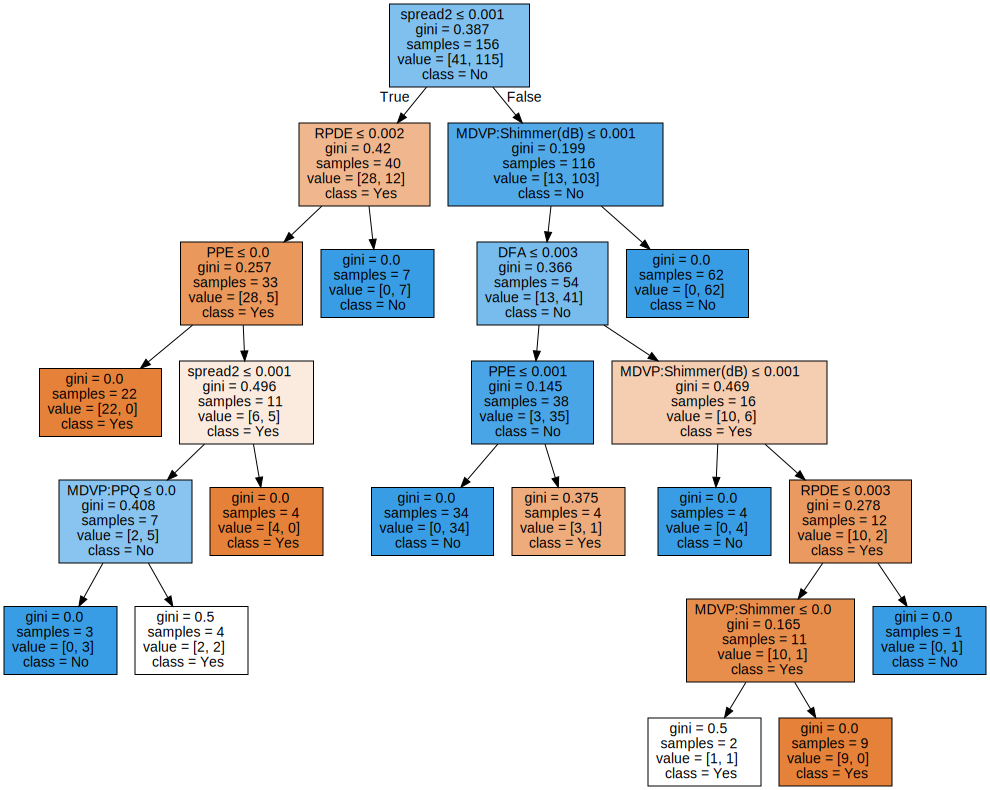

In [20]:
data1 = export_graphviz(best_model1,   
                      out_file=None, 
                      feature_names=X.columns,       #Provide X Variables Column Names 
                      class_names=['Yes','No'],      # Provide Target Variable Column Name
                      filled=True, rounded=False,     # Controls the look of the nodes and colours it
                      special_characters=True)  
graph = graphviz.Source(data1)  
graph 

In [21]:
model_grid2=RandomizedSearchCV(ExtraTreeClassifier(), 
                             param_distributions =parametre, cv = 10, verbose = True)
model_grid2.fit(X_train, Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=ExtraTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (3, 5, 7, 9, 10, 15, 20,
                                                      25),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6, 8)},
                   verbose=True)

In [22]:
model_grid2.best_estimator_

ExtraTreeClassifier(max_depth=7, max_features='sqrt')

In [23]:
best_model2=model_grid2.best_estimator_
best_model2.fit(X_train,Y_train)
score=best_model2.score(X_test,Y_test)
print(score)

0.8974358974358975


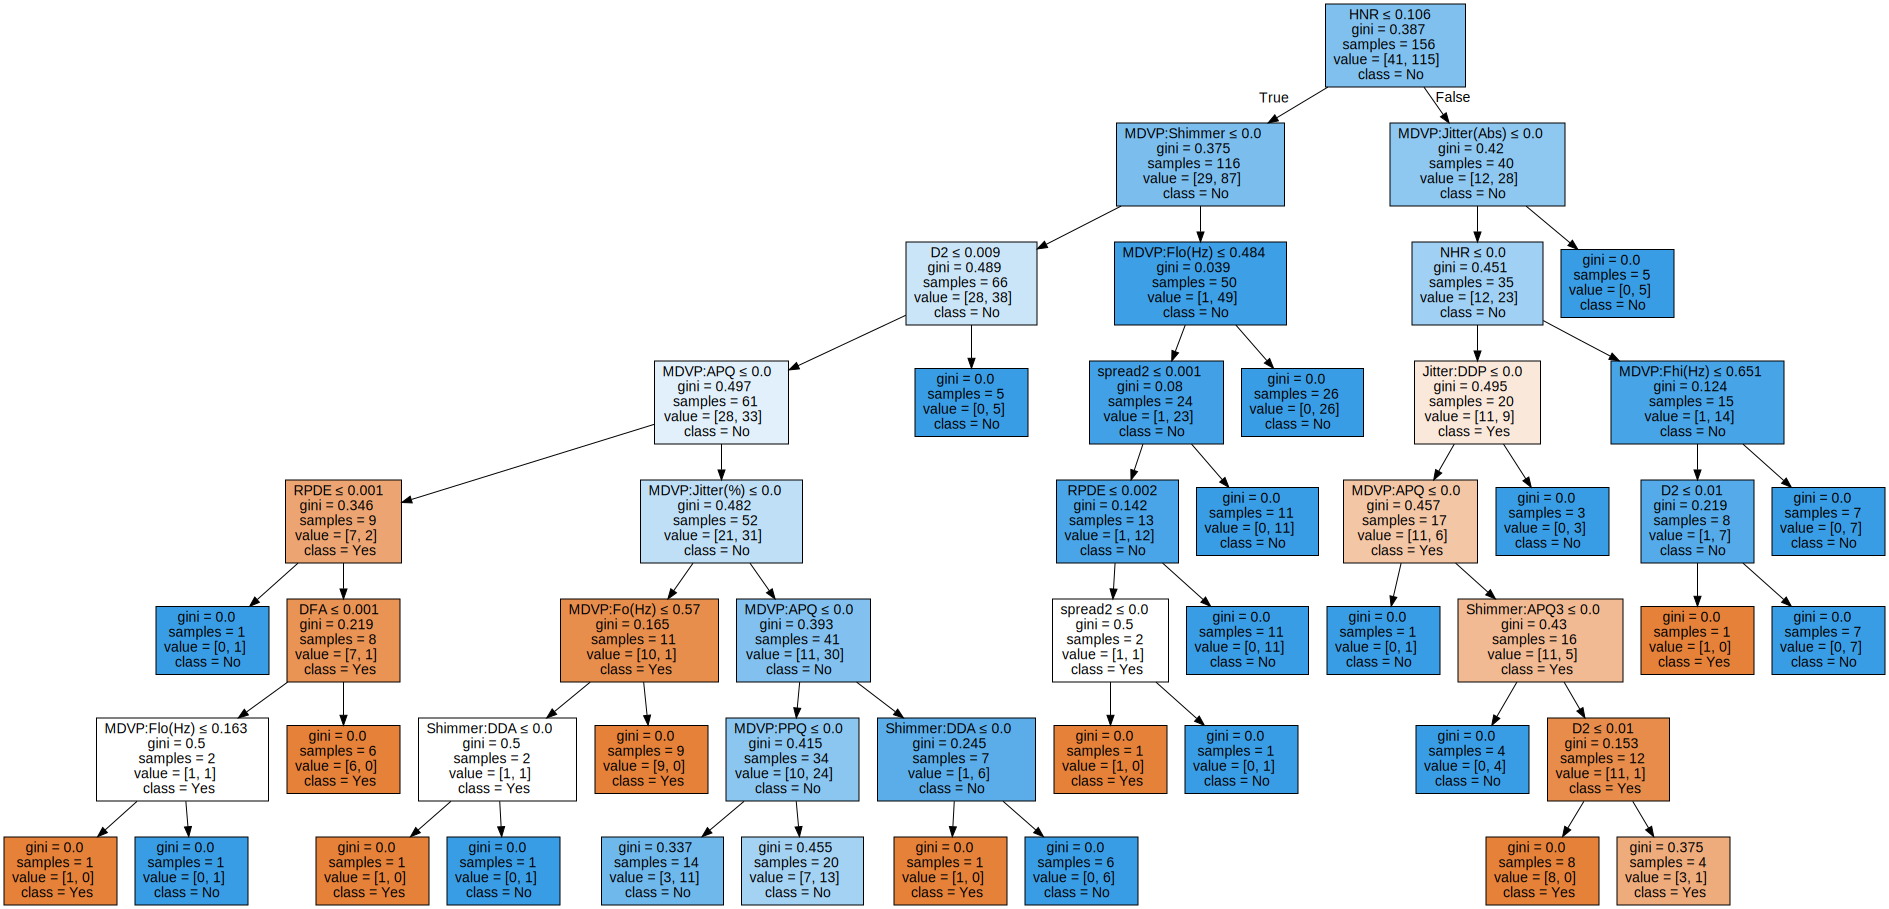

In [24]:
##Visualitaion 
data2 = export_graphviz(best_model2,   
                      out_file=None, 
                      feature_names=X.columns,       #Provide X Variables Column Names 
                      class_names=['Yes','No'],      # Provide Target Variable Column Name
                      filled=True, rounded=False,     # Controls the look of the nodes and colours it
                      special_characters=True)  
graph = graphviz.Source(data2)  
graph 

**Support Vector Machine Model**

In [25]:
from sklearn.svm import SVC
param=param={'kernel':('linear', 'poly', 'rbf', 'sigmoid'),
      'C':np.arange(1,42,10),
      'degree':np.arange(3,6),   
      'coef0':np.arange(0.001,3,0.5),
      'gamma': ('auto', 'scale')}
model =SVC()
model_grid3=RandomizedSearchCV(model, 
                             param, cv = 5)
model_grid3.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': array([ 1, 11, 21, 31, 41]),
                                        'coef0': array([1.000e-03, 5.010e-01, 1.001e+00, 1.501e+00, 2.001e+00, 2.501e+00]),
                                        'degree': array([3, 4, 5]),
                                        'gamma': ('auto', 'scale'),
                                        'kernel': ('linear', 'poly', 'rbf',
                                                   'sigmoid')})

In [26]:
model_grid3.best_estimator_

SVC(C=31, coef0=2.001)

In [27]:
# training the SVM model with training data
modelSVC=model_grid3.best_estimator_
modelSVC.fit(X_train, Y_train)
score=modelSVC.score(X_test,Y_test)
print (score)

0.8205128205128205


# SECOND APPROACH

In [28]:
# For example w'ill use SVC,RandomForestClassifier,KNeighborsClassifier and using GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [29]:
#Creating function to compare score
def test_model_param(params,X,y):
    scores = [] # On va stocker les différents score
    for model_name, mp in params.items():
        clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
        clf.fit(X, y)
        scores.append({
            'model': model_name,
            'best_score': clf.best_score_,
            'best_params': clf.best_params_
        })
    return (pd.DataFrame(scores,columns=['model','best_score','best_params']))

In [30]:
# we crating a dict with all our models possible hyperparameters 
tab_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'KNeighbors' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': np.arange(1, 50),
            'p':[1,2,3],
            'weights':['uniform','distance']
        }
    }
}

In [31]:
#testing
test_model_param(tab_params,X_train,Y_train)

,model,best_score,best_params
0,svm,0.737298,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.890927,{'n_estimators': 10}
2,KNeighbors,0.821371,"{'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}"
